**Goal:**
Examine if the floor number in the updated HCMC dataset correlates with the DSM values. If so than approximate all missing floor numbers in the HCMC dataset by the DSM 

In [188]:
import sys, os

import numpy as np
import pandas as pd
import geopandas as gpd
import re
import rasterio as rio

import matplotlib.pyplot as plt
import seaborn as sns


sys.path.insert(0, "../")
#sys.path.insert(0,os.getcwd())
import utils.utils_figures as f
import utils.utils_feature_selection as fs

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)


TODO
- add GPS location to not updated records - move all float starting with smaller values.xx to the front
- extract business locations from BuildingHeigths
- correlate , linear 

In [189]:
df_candidates = gpd.read_file("../input_survey_data/raw_data_vietnamese_geolocations_no_dublicates_for_shp.shp")
#df_candidates = gpd.read_file("../input_survey_data/raw_data_vietnamese_geolocations_no_dublicates_gps_inaccurate.csv")
df_candidates.tail(3)

dlr_building_height = "../input_survey_data/DEM_LiDAR/WSF3D_V02_BuildingHeight_HCMC.tif" # shop locations including elevation height based on original and interpolated DEM
dlr_building_height



'../input_survey_data/DEM_LiDAR/WSF3D_V02_BuildingHeight_HCMC.tif'

In [190]:
df_candidates["shp_building_heights_m"] = None
coords = df_candidates.get_coordinates().values

with rio.open(dlr_building_height) as src:
    df_candidates["shp_building_heights_m"] = [x[0] for x in src.sample(coords)]

df_candidates["shp_building_heights_m"] =  df_candidates["shp_building_heights_m"]  / 10 # fix decimals 
# df_candidates["shp_building_heights_m"] 

## Correlation floor numbers ~ DSM
First check how well the obtained floor numbers correlates with building heights
Sampel size: 61 companies for which floor number and improved geolocation exists

In [194]:
## use only compaines in buidlings with not more than 3 floors
df_candidates = df_candidates.loc[df_candidates.Nr_Floors <= 3.0, :]
## use only compaines in buidlings with a reasonable building height
df_candidates = df_candidates.loc[df_candidates.shp_building_heights_m < 25, :]
print(df_candidates.shape)

(63, 7)


In [195]:
print("Pearson Corr:", df_candidates["shp_building_heights_m"].corr(df_candidates["Nr_Floors"] ))
print("Spearman's rho:", df_candidates["shp_building_heights_m"].corr(df_candidates["Nr_Floors"], method="spearman"))

Pearson Corr: -0.06160706210242446
Spearman's rho: -0.023888329859659576


-> no reasonable correlation between building height and the matched floor number could be found

<Axes: xlabel='Nr_Floors', ylabel='shp_building_heights_m'>

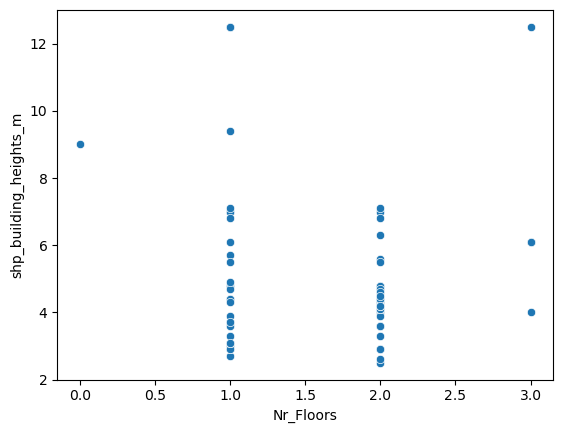

In [196]:
## plot correlation
sns.scatterplot(data=df_candidates, x="Nr_Floors", y="shp_building_heights_m")
# --> qualitatively also no correlation